<a href="https://colab.research.google.com/github/JAWolfe04/CS5542/blob/master/ICP1/Sources/CancerDataInterpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [402]:
import seaborn as sns
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [403]:
data = pd.read_csv('/content/drive/My Drive/Data.csv')

In [404]:
data.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [405]:
data.rename(columns = {'concave points_mean' : 'concave_points_mean', \
                         'concave points_worst':'concave_points_worst'}, \
              inplace = True)
data = data.drop(columns=['id','Unnamed: 32'])

In [406]:
benign = data.groupby('diagnosis').get_group('B').drop(columns=['diagnosis'])
malignant = data.groupby('diagnosis').get_group('M').drop(columns=['diagnosis'])

In [407]:
for i in range(0, len(benign.columns)):
  print(i, benign.columns[i], "-", stats.ttest_ind(benign.iloc[:, i], malignant.iloc[:, i], equal_var = False, nan_policy = 'omit')[1])

0 radius_mean - 1.6844591259582747e-64
1 texture_mean - 3.019055292193917e-25
2 perimeter_mean - 1.0231409970104587e-66
3 area_mean - 3.284366459573323e-52
4 smoothness_mean - 5.573331322107757e-19
5 compactness_mean - 9.607863145123788e-42
6 concavity_mean - 3.742120672313664e-58
7 concave_points_mean - 3.1273162856782697e-71
8 symmetry_mean - 5.957650760938452e-15
9 fractal_dimension_mean - 0.766721601131519
10 radius_se - 1.4911328540231125e-30
11 texture_se - 0.8354170682009693
12 perimeter_se - 6.868552881086801e-29
13 area_se - 2.983567645621385e-26
14 smoothness_se - 0.10529700302804572
15 compactness_se - 6.341807077270803e-12
16 concavity_se - 1.2665140376966787e-11
17 concave points_se - 4.042197239517219e-24
18 symmetry_se - 0.8871222602903024
19 fractal_dimension_se - 0.0422023771055649
20 radius_worst - 3.556557294296528e-71
21 texture_worst - 5.198707921113448e-30
22 perimeter_worst - 1.0327299382322627e-72
23 area_worst - 4.937923843586185e-54
24 smoothness_worst - 3.474

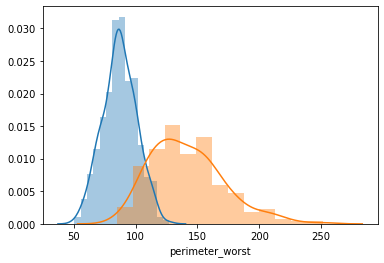

In [408]:
sns.distplot(benign.perimeter_worst)
sns.distplot(malignant.perimeter_worst)

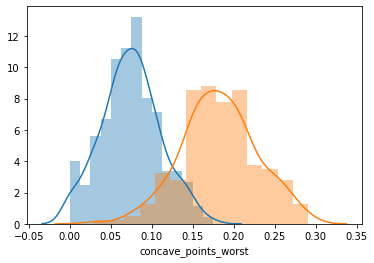

In [409]:
sns.distplot(benign.concave_points_worst)
sns.distplot(malignant.concave_points_worst)

In [410]:
values = data.iloc[:,[22,27]].values
labels = data.iloc[:,[0]].values

In [411]:
values_train, values_test, labels_train, labels_test = train_test_split(values, labels, 
                                                                        test_size = 0.25, random_state = 0)

In [412]:
sc = StandardScaler()
values_train = sc.fit_transform(values_train)
values_test = sc.transform(values_test)

In [413]:
classifier = KNeighborsClassifier()
classifier.fit(values_train, labels_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [414]:
labels_pred = classifier.predict(values_test)
cm = confusion_matrix(labels_test, labels_pred)
total = cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1]
acc = (cm[0][0] + cm[1][1]) / total
print("accuracy =", acc)

accuracy = 0.8811188811188811
